**Universidad Privada Boliviana**

**Extensión Universitaria**

**Experto en Análisis estadístico de datos con Python**

**Docente: Mauro Delboy Ph.D(c)**

## <div align="center">Trabajo Final - Experto en análisis estadístico de datos con Python

GRUPO: **GPD**

*Integrantes:*
- Carlos Andrés Pérez Guzmán
- Gerson Flores
- José Esponoza
- Jhonny Mammani

---

### 1. Librerías

In [42]:
# Librerías de trabajo y cálculo
import pandas as pd, numpy as np

# Cálculo de la moda
from statistics import multimode

# Gráficos
import matplotlib.pyplot as plt, seaborn as sns

# Resolución de gráficos
plt.rcParams['figure.dpi'] = 90

### 2. Carga de datos

In [2]:
df = pd.read_csv(filepath_or_buffer = 'Data/zapatos.csv', sep = ',', decimal = '.', parse_dates = ['Date'])
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,$159.00,0%,$159.00
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,$199.00,20%,$159.20
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,$149.00,20%,$119.20
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,$159.00,0%,$159.00
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,$159.00,0%,$159.00


### 3. Generalidades del origen de datos

Existe un solo archivo de datos consolidado con 14967 registros y 12 variables bien definidas de tipo cualitativo y cuantitativo, las cuales no presentan valores faltantes (NaN). Bajo un vistazo general, las filas representan la venta de zapatos identificada por un número de factura. Las columnas definen las características y condiciones de dicha venta.

Por otro lado, se debe observar y validar la integridad de los datos para asignar el tipo correcto de vairable.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  object        
 10  Discount       14967 non-null  object        
 11  SalePrice      14967 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 1.4+ MB


In [4]:
df.isnull().values.any()

False

El número de factura no representa a una fila exclusivamente. Por ejemplo, existe una factura N° 62453 está presente en 5 filas del dataset. Esto quiere decir que cada fila representa la venta de un producto en cierto número de factura y según las características otorgadas por las demás variables. De esta manera, no se necesita de otro índice del que ya se dispone en el Dataframe.

In [5]:
df['InvoiceNo'].value_counts().value_counts()

1    12025
2     1181
3      153
4       29
5        1
Name: InvoiceNo, dtype: int64

In [6]:
df['InvoiceNo'].value_counts().head(1)

62453    5
Name: InvoiceNo, dtype: int64

In [7]:
df.loc[df['InvoiceNo'] == 62453]

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
11247,62453,2016-07-05,United States,2218,US4,Male,10.5,43-44,10.0,$189.00,0%,$189.00
11248,62453,2016-07-05,United States,2222,US2,Male,8.5,41-42,8.0,$199.00,0%,$199.00
11249,62453,2016-07-05,United States,2181,US15,Male,11.5,44-45,11.0,$189.00,20%,$151.20
11250,62453,2016-07-05,United States,2151,US15,Female,8.5,39,6.5,$189.00,50%,$94.50
11251,62453,2016-07-05,United States,2183,US15,Female,8.5,39,6.5,$139.00,0%,$139.00


### 4. Transformaciones preliminares

In [8]:
df_01 = df.copy()

In [9]:
df_01.dtypes.index

Index(['InvoiceNo', 'Date', 'Country', 'ProductID', 'Shop', 'Gender',
       'Size (US)', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount',
       'SalePrice'],
      dtype='object')

In [10]:
# Eliminación de los caracteres '%' y '$'
df_01.replace(to_replace = ['%','\$'], value = '', regex = True, inplace = True)

# Asignación de variables numéricas
var = ['InvoiceNo','ProductID','Size (US)', 'Size (UK)', 'UnitPrice', 'Discount','SalePrice']
df_01[var] = df_01[var].apply(pd.to_numeric, errors = 'coerce')

# Asignación de variables cualitativas
df_01 = df_01.astype({'Gender':'category','Country':'category'})

df_01.info()
print(df_01.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  category      
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  category      
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  float64       
 10  Discount       14967 non-null  int64         
 11  SalePrice      14967 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 1.2+ MB
False


### 5. Consignas de trabajo
Ahora que los datos fueron revisados, se pueden ejecutar análisis y estraer información útil

#### 5.1. Utilice la base de datos zapatos.csv y realice un análisis estadístico obteniendo media, mediana, moda y demás medidas de tendencia central y de dispersión.

In [11]:
# Formato de visualización
pd.options.display.float_format = '{:.2f}'.format

# Regresar a los valroes por defecto
#pd.reset_option('all', silent = True)

Análisis de vairables cuantitativas

In [43]:
df_01[['Date','Size (US)','Size (UK)','UnitPrice','Discount','SalePrice']].describe(datetime_is_numeric = True)

,Date,Size (US),Size (UK),UnitPrice,Discount,SalePrice
count,14967,14967.00,14967.00,14967.00,14967.00,14967.00
mean,2015-10-27 21:36:04.040889600,9.20,8.09,164.17,12.40,143.99
min,2014-01-01 00:00:00,4.50,2.50,129.00,0.00,64.50
25%,2015-04-05 00:00:00,8.00,6.50,149.00,0.00,125.10
50%,2015-12-22 00:00:00,9.00,8.50,159.00,0.00,149.00
75%,2016-07-04 00:00:00,10.00,9.50,179.00,20.00,169.00
max,2016-12-31 00:00:00,15.00,14.50,199.00,50.00,199.00
std,NaN,1.51,1.97,22.94,17.01,35.18


Análisis de variables cualitativas

In [13]:
df_01.describe(exclude = ['float64','int64','datetime64[ns]'])

,Country,Shop,Gender,Size (Europe)
count,14967,14967,14967,14967
unique,4,29,2,24
top,United States,GER2,Male,42-43
freq,5886,1947,8919,1968


Análisis de modas en el Dataset

In [14]:
df_01.apply(multimode)

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
0,62453,2016-10-18,United States,2190,GER2,Male,9.50,42-43,9.00,199.00,0,199.00


#### 5.2. Genere una variable llamada "Dif_Price" que muestre la diferencia entre el precio de venta (SalePrice) y el precio unitario (UnitPrice).

In [15]:
df_01['Dif_Price'] = df_01['SalePrice'] - df_01['UnitPrice']
df_01.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Dif_Price
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.00,44,10.50,159.00,0,159.00,0.00
1,52390,2014-01-01,United States,2230,US15,Male,11.50,44-45,11.00,199.00,20,159.20,-39.80
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.50,42-43,9.00,149.00,20,119.20,-29.80
3,52392,2014-01-01,United States,2234,US6,Female,9.50,40,7.50,159.00,0,159.00,0.00
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.00,39-40,7.00,159.00,0,159.00,0.00


#### 5.3. Si un zapato de talla 9 en Estados Unidos (SizeUS=9.0), equivale a un zapato talla 40 en Latinoamérica, genere una columna llamada Size(LATAM) que muestre la talla de zapatos en Latinoamérica.

Se asume que el cambio de talla en un zapato es lineal, por tanto la operación que contendrá la columna "Size(LATAM)" será:

$$\text{Size (LATAM)} =  \text{Size (US)} \cdot \frac{40}{9}$$

In [16]:
df_01.insert(loc = 7, column = 'Size(LATAM)', value = df_01['Size (US)'] * (40/9))
df_01.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size(LATAM),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Dif_Price
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.00,48.89,44,10.50,159.00,0,159.00,0.00
1,52390,2014-01-01,United States,2230,US15,Male,11.50,51.11,44-45,11.00,199.00,20,159.20,-39.80
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.50,42.22,42-43,9.00,149.00,20,119.20,-29.80
3,52392,2014-01-01,United States,2234,US6,Female,9.50,42.22,40,7.50,159.00,0,159.00,0.00
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.00,40.00,39-40,7.00,159.00,0,159.00,0.00


#### 5.4. Realice un análisis de visualización de datos de la base zapatos.csv, utilizando todas las gráficas vistas en clase. Es importante que realice la interpretación de cada uno de estos gráficos

Las características de los datos muestran que la información se venera a partir de una venta. Por lo cual las variables de agregación serán aquellas dependientes del precio, el descuento y el tipo de producto. 

##### a) Facturas con más registros de productos

La cantidad de productos adquiridos por venta (factura) se caracteriza por incluir un solo para de zapatos. Los casos que incluyen más productos por factura son muy poco frecuentes. 

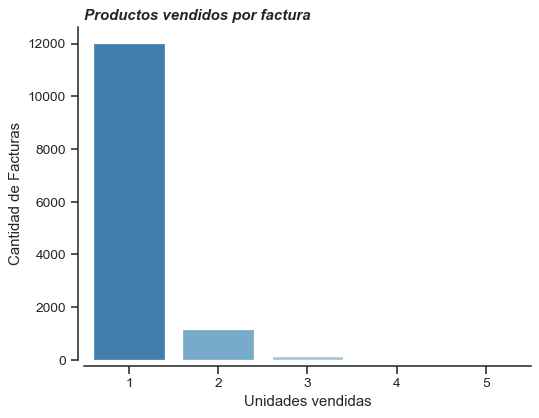

In [17]:
sns.set_theme(style = 'ticks',palette = 'tab20c', font = 'Arial')

aux_a = df_01['InvoiceNo'].value_counts().value_counts()

sns.barplot(x = aux_a.index, y = aux_a.values)
plt.title(label = 'Productos vendidos por factura', loc = 'left', size = 12, fontstyle = 'italic', fontweight = 'bold')
plt.xlabel(xlabel = 'Unidades vendidas', size = 12)
plt.ylabel(ylabel = 'Cantidad de Facturas', size = 12)
sns.despine(offset = 5, trim = False, bottom = False)

In [18]:
aux_a

1    12025
2     1181
3      153
4       29
5        1
Name: InvoiceNo, dtype: int64

##### b) Ventas por país

EEUU es el país que reporta más ingresos por calzados con un 39%, seguido por Alemania, luego Canadá, y, en último lugar con un 12%, El Reino Unido

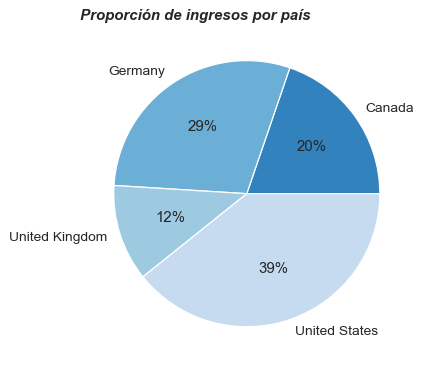

In [19]:
plt.title(label = 'Proporción de ingresos por país', loc = 'left', size = 12, fontstyle = 'italic', fontweight = 'bold')
aux_b = df_01.groupby(by = ['Country']).sum(numeric_only = True)['SalePrice']
plt.pie(aux_b.values, labels = aux_b.index, autopct = '%.0f%%')
plt.show()

Se puede notar que los zapatos de hombres proporcionan un ingreso más alto respecto que los de mujeres. Asimismo, los ingresos en EEUU y Alemnaia son las más altos independientemente del género.

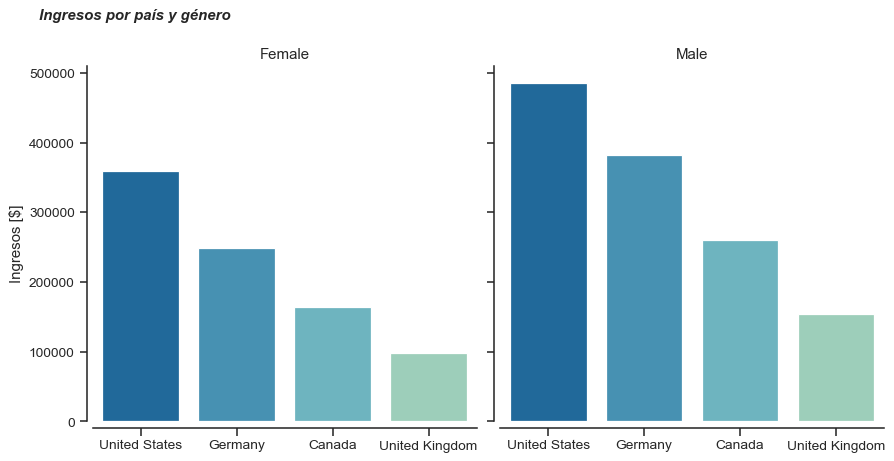

In [20]:
sns.set_theme(style = 'ticks',palette = 'GnBu_r', font = 'Arial')

bar_order = df_01['Country'].value_counts(ascending = False).index.tolist()

g = sns.catplot(data = df_01, x = 'Country', y = 'SalePrice', order = bar_order,
            kind = 'bar', estimator = 'sum', col = 'Gender',
            errorbar = None)
g.set_axis_labels(x_var = '', y_var = 'Ingresos [$]')
g.set_titles('{col_name}')

plt.suptitle(t = 'Ingresos por país y género', y = 1.05, x = 0.15,
             fontstyle = 'italic', fontweight = 'bold', size = 12)

sns.despine(offset = 5, trim = False, bottom = False)

In [21]:
(df_01.groupby(by = ['Country','Gender']).
 sum(numeric_only = True)['SalePrice'].
 reset_index(name = 'Ingresos').
 sort_values(by = ['Country','Ingresos'], ascending = False))

,Country,Gender,Ingresos
7,United States,Male,486305.40
6,United States,Female,359674.20
5,United Kingdom,Male,154008.90
4,United Kingdom,Female,98734.80
3,Germany,Male,381750.30
2,Germany,Female,248829.60
1,Canada,Male,260826.00
0,Canada,Female,164937.90


##### c) Distribución de la talla por género

Casi la mitad de los zapatos de hombre se encuentran por encima de la talla 40 , mientras que 75% de los datos de los zapatos de mujeres se encuentra por debajo de la talla 40. La dispersión de los datos es similar aunque los hombres tienen más valores atípicos.

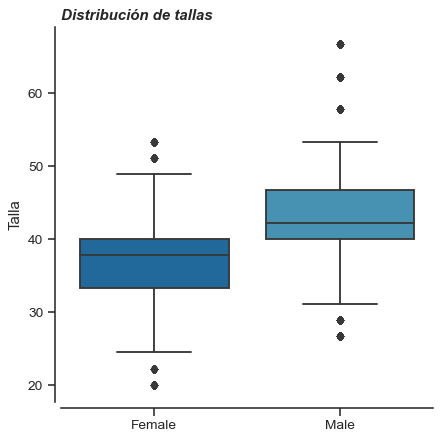

In [22]:
sns.set_theme(style = 'ticks',palette = 'GnBu_r', font = 'Arial')

sns.catplot(data = df_01, x = 'Gender', y = 'Size(LATAM)',kind = 'box')

plt.title(label = 'Distribución de tallas', loc = 'left', size = 12, fontstyle = 'italic', fontweight = 'bold')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = 'Talla', size = 12)
sns.despine(offset = 5, trim = False, bottom = False)

##### d) Relación entre precio unitario y talla

A medida que la talla de los zapatos crece, el precio cambia en proporciones parecidas con una tendencia lineal. 

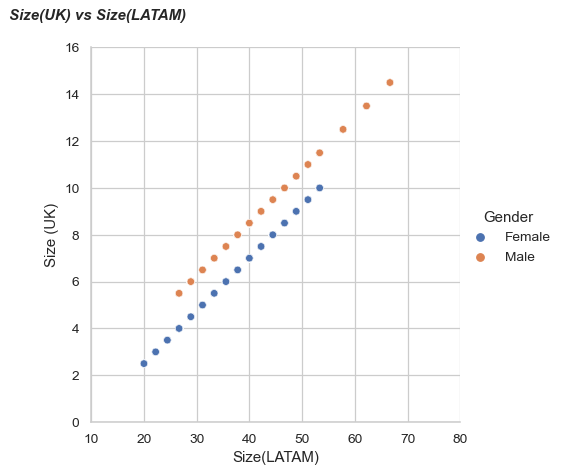

In [23]:
sns.set_theme(style = 'whitegrid', font = 'Arial')

sns.relplot(data = df_01, x = 'Size(LATAM)', y = 'Size (UK)', hue = 'Gender',
            facet_kws={'sharey': True, 'sharex': True})

plt.suptitle(t = 'Size(UK) vs Size(LATAM)', y = 1.05, x = 0.15,
             fontstyle = 'italic', fontweight = 'bold', size = 12)

plt.subplots_adjust(hspace = 0.2, wspace = 0.1)
plt.xlim(10,80)
plt.ylim(0,16);

#### 5.5. Habiendo generado las dos anteriores columnas y utilizando funciones condicionales responda a las siguientes preguntas:

**¿Cuánto cuesta en promedio un zapato para hombre en Estados Unidos?**

El precio nominal de un par de zapatos en EEUU es de 163.03 dólares, pero si se adquieren con descuento el precio promedio sería 143.58 dólares.

In [24]:
aux = df_01.groupby(by = ['Country','Gender']).mean(numeric_only = True)[['UnitPrice','Discount','SalePrice']]
aux

UnitPrice  Discount  SalePrice
Country        Gender                                
Canada         Female     164.76     11.49     145.83
               Male       164.65     13.18     143.23
Germany        Female     164.60     13.14     143.01
               Male       163.88     12.34     143.95
United Kingdom Female     164.62     11.77     145.63
               Male       166.25     12.55     145.43
United States  Female     164.11     12.41     143.93
               Male       163.03     12.03     143.58

**¿En qué país se venden los zapatos más caros?**

Los zapatos más caros tienen un precio de 199 $. Este precio de venta, no tinene descuento y se puede encontrar en los cuatro paises del dataset, sin embargo, EEUU tiene más registros de ventas respecto a los demás paises.

In [25]:
df_01['SalePrice'].max()

199.0

In [26]:
df_01['Country'].unique()

['United Kingdom', 'United States', 'Canada', 'Germany']
Categories (4, object): ['Canada', 'Germany', 'United Kingdom', 'United States']

In [50]:
df_01.loc[df_01['SalePrice'] == 199, 'Country'].value_counts()

United States     432
Germany           288
Canada            252
United Kingdom    171
Name: Country, dtype: int64

**¿En qué tienda (Variable Shop) se venden los zapatos más baratos?**

Las tiendas cuyo precio es mínimo corresponde a GRE1 y GER2 establecidas en Alemania con un valor de 33 y 30 dólares respectivamente.

In [28]:
df_01['SalePrice'].min()

64.5

In [54]:
df_01.loc[df_01['SalePrice'] == df_01['SalePrice'].min(),['Shop','Country']].value_counts().head()

Shop  Country      
GER1  Germany          33
GER2  Germany          30
US12  United States    21
CAN5  Canada           18
CAN6  Canada           15
dtype: int64

**¿En qué fecha se hizo el descuento más alto en el Reino Unido?**

El descuento más alto para el Reino Unido se llevó a cabo entre el 26/01/2014 y 17/12/2016

In [31]:
# Descuento más alto
df_01.loc[df_01['Country'] == 'United Kingdom','Discount'].max()

50

In [56]:
df_01.loc[(df_01['Country'] == 'United Kingdom') & (df_01['Discount'] == 50),'Date'].min()

Timestamp('2014-01-26 00:00:00')

In [33]:
df_01.loc[(df_01['Country'] == 'United Kingdom') & (df_01['Discount'] == 50),'Date'].max()

Timestamp('2016-12-17 00:00:00')

**¿De qué talla americana (Variable Size(US)) es el zapato femenino más grande?**

El zapato femenino más grade para mujer es 12

In [74]:
df_01.sort_values(by = ['Size (US)'], ascending = False).loc[df_01['Gender'] == 'Female','Size (US)'].head()

11711   12.00
1945    12.00
7128    12.00
10996   12.00
13593   12.00
Name: Size (US), dtype: float64

**¿En qué país se han hecho más descuentos?**

Se hicieron más decuentos en EEUU

In [81]:
df_01.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size(LATAM),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Dif_Price
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.00,48.89,44,10.50,159.00,0,159.00,0.00
1,52390,2014-01-01,United States,2230,US15,Male,11.50,51.11,44-45,11.00,199.00,20,159.20,-39.80
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.50,42.22,42-43,9.00,149.00,20,119.20,-29.80
3,52392,2014-01-01,United States,2234,US6,Female,9.50,42.22,40,7.50,159.00,0,159.00,0.00
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.00,40.00,39-40,7.00,159.00,0,159.00,0.00


In [83]:
df_01.groupby(by = ['Country']).sum(numeric_only = True)['Dif_Price'].sort_values(ascending = True)

Country
United States    -116324.40
Germany           -90428.10
Canada            -60404.10
United Kingdom    -34929.30
Name: Dif_Price, dtype: float64

**Basándose solo en el precio (Sale Price), ¿en qué país prefería comprar una mujer que calza talla 6.5 americana?**

SI se toma la media como un decisor es más recomendable comprar en EEUU. Si tomamos el valor mínimo, es mejor en Canadá.

In [36]:
df_01.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size(LATAM),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Dif_Price
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.00,48.89,44,10.50,159.00,0,159.00,0.00
1,52390,2014-01-01,United States,2230,US15,Male,11.50,51.11,44-45,11.00,199.00,20,159.20,-39.80
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.50,42.22,42-43,9.00,149.00,20,119.20,-29.80
3,52392,2014-01-01,United States,2234,US6,Female,9.50,42.22,40,7.50,159.00,0,159.00,0.00
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.00,40.00,39-40,7.00,159.00,0,159.00,0.00


In [85]:
(df_01.loc[(df_01['Size (US)'] == 6.5) & (df_01['Gender'] == 'Female'),['Country','SalePrice','Size (US)','Gender']].
 groupby(by = ['Country']).mean(numeric_only = True).sort_values(by = ['SalePrice']))

,SalePrice,Size (US)
Country,,
United States,133.95,6.50
Germany,139.82,6.50
Canada,142.39,6.50
United Kingdom,150.47,6.50


In [38]:
(df_01.loc[(df_01['Size (US)'] == 6.5) & (df_01['Gender'] == 'Female'),['SalePrice','Country']].
 groupby(by = ['Country'])).min().sort_values(by = ['SalePrice'])

,SalePrice
Country,
Canada,64.50
Germany,74.50
United States,74.50
United Kingdom,97.30


**Realice las gráficas de la evolución de ventas en cada país e interprete el mercado que tiene mejor perspectiva de ventas.**

El análisis de evolución de las ventas muestra que el mercado de EEUU tuvo la mejores ventas a los largo de los años. Sin embargo, su tendencia está en el descenso. Por otra parte, el mercado en Canada tuvo ventas ligeramente crecientes, con vaivenes pero con señales de crecimiento.

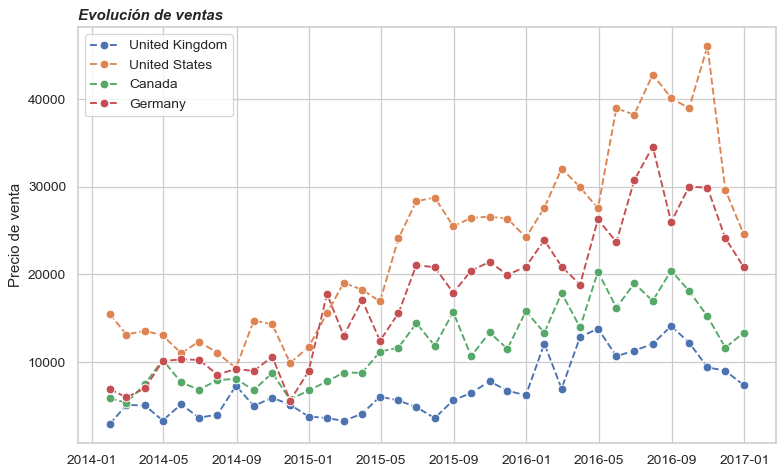

In [172]:
sns.set_theme(style = 'whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

df_02 = df_01.copy()
for i in df_02['Country'].unique().tolist():
    aux = df_02.copy().loc[df_02['Country'] == i]
    aux = aux.set_index('Date')
    aux = aux.resample(rule = 'M').sum(numeric_only = True)
    sns.lineplot(data = aux, x = 'Date', y = 'SalePrice', label = i,
                 marker = "o", linestyle = 'dashed', markersize = 7)

ax.legend()
plt.title(label = 'Evolución de ventas', loc = 'left', size = 12, fontstyle = 'italic', fontweight = 'bold')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = 'Precio de venta', size = 12);

In [181]:
# Valores de la gráfica de tiempo

df_03 = df_01.copy()
df_03['year'] = pd.DatetimeIndex(df_01['Date']).year
df_03['month'] = pd.DatetimeIndex(df_01['Date']).month

df_03 = pd.pivot_table(df_03, index = ['year','month'],
                       values = ['SalePrice'],
                       columns = ['Country'],
                       aggfunc = np.sum)
df_03

SalePrice                                       
Country       Canada   Germany United Kingdom United States
year month                                                 
2014 1      5,895.70  6,931.70       2,924.90     15,500.00
     2      5,358.40  5,982.30       5,122.50     13,149.30
     3      7,481.10  6,999.90       5,065.80     13,570.20
     4     10,273.60 10,132.40       3,348.10     13,043.90
     5      7,682.20 10,310.00       5,195.10     11,021.50
     6      6,870.80 10,260.60       3,667.60     12,349.40
     7      7,946.30  8,584.50       4,027.60     11,039.40
     8      8,095.10  9,219.00       7,301.90      9,328.30
     9      6,810.40  8,987.10       5,024.50     14,740.40
     10     8,765.50 10,630.70       5,945.40     14,316.80
     11     5,733.00  5,614.70       5,153.10      9,908.30
     12     6,774.50  8,955.90       3,803.60     11,721.60
2015 1      7,806.30 17,779.90       3,630.00     15,589.50
     2      8,810.90 13,000.60       3,295.80     19,036.80
     3      8,777.30 17,065.20       4,133.80     18,260.30
     4     11,201.10 12,439.80       6,066.00     16,916.80
     5     11,654.70 15,588.30       5,633.90     24,107.70
     6     14,441.30 21,049.70       4,876.10     28,335.30
     7     11,866.50 20,813.80       3,622.40     28,760.90
     8     15,707.00 17,901.40       5,664.10     25,484.00
     9     10,669.40 20,410.90       6,476.70     26,430.70
     10    13,379.60 21,431.60       7,813.60     26,586.00
     11    11,514.40 19,941.20       6,746.40     26,349.40
     12    15,810.40 20,893.00       6,222.00     24,221.70
2016 1     13,341.30 23,900.60      12,106.50     27,586.40
     2     17,887.70 20,895.40       6,983.00     32,053.50
     3     13,954.70 18,835.70      12,856.10     29,948.00
     4     20,308.30 26,267.70      13,819.70     27,510.30
     5     16,199.00 23,689.80      10,678.40     38,927.50
     6     18,968.30 30,719.10      11,306.90     38,204.00
     7     16,983.70 34,568.10      12,081.00     42,768.80
     8     20,432.90 25,953.90      14,110.30     40,129.30
     9     18,128.00 29,998.90      12,234.40     38,911.80
     10    15,212.90 29,883.70       9,415.40     46,003.60
     11    11,647.10 24,125.50       9,011.20     29,620.20
     12    13,374.50 20,817.30       7,379.90     24,548.00